<a href="https://colab.research.google.com/github/SivaKrishnaDulla96/Netflix_data_exploration_and_visualisation/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BusinessCase: Netflix by siva krishna**

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Eploratory Data Analysis: Netflix Dataset


*   Analyse the dataset to recommend the show types.
*   Based on EDA findings draw plots for visual presentation




In [ ]:
#load dataset
df= pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# create a copy of original data
data = df.copy()
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#shape of dataset
shape = df.shape
print(f"The dataset contains {shape[0]} rows and {shape[1]} columns.")

The dataset contains 8807 rows and 12 columns.


In [ ]:
# Display the data types and memory usage of each column
data_types = df.dtypes
memory_usage = df.memory_usage(deep=True)
print("Data Types:\n", data_types)
print("\nMemory Usage (in bytes):\n", memory_usage)


Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Memory Usage (in bytes):
 Index               128
show_id          544927
type             551386
title            671398
director         547911
cast            1705661
country          581565
date_added       631404
release_year      70456
rating           540938
duration         563918
listed_in        796204
description     2146200
dtype: int64


In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print('Missing values are \n', missing_values)

Missing values are 
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# check percentage of missing values in dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100
print('Percentage of missing values are \n', missing_percentage)

Percentage of missing values are 
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [ ]:
# Generate summary statistics for numerical columns
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
# Generate a summary for categorical features
categorical_summary = df.describe(include=['object', 'category'])
categorical_summary

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Summary of Findings**

**Shape:**
The dataset has 8807 rows and 12 columns.

**Data Types:**
The dataset contains a mix of integer and object data types.
We observe that the date_added and duration columns have object datatypes. We have to change date_added to datetime and duration to integer respectively.

**Memory Usage:**
The dataset uses a total of 8,937,920 bytes of memory.

**Missing Values:**
Significant missing data in the director, cast, and country columns.
The director column is missing 29.90% of its values.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['duration'] = df['duration'].str.extract('(\d+)')

df['duration'] = pd.to_numeric(df['duration'])

**Handling Null Values**



In [ ]:
#for categorical data
values = {"director": 'Unknown Director', "cast": 'Unknown Actor', "country": 'Unknown Country', "rating" : 'Unknown Rating'}
df.fillna(value=values, inplace=True)

In [ ]:
#for numerical data
values = {"duration" : 0}
df.fillna(value=values, inplace=True)
df['duration'] = df['duration'].astype(int)

In [ ]:
#for datetime
df['date_added'].fillna(method='ffill', inplace=True)


In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Unnesting the columns**

In [ ]:
df['listed_in']=df['listed_in'].str.split(',')
df['listed_in']


0                                         [Documentaries]
1       [International TV Shows,  TV Dramas,  TV Myste...
2       [Crime TV Shows,  International TV Shows,  TV ...
3                               [Docuseries,  Reality TV]
4       [International TV Shows,  Romantic TV Shows,  ...
                              ...                        
8802                   [Cult Movies,  Dramas,  Thrillers]
8803           [Kids' TV,  Korean TV Shows,  TV Comedies]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 8807, dtype: object

In [ ]:
df=df.explode('listed_in').reset_index(drop=True)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
df['country']=df['country'].str.split(',')
df=df.explode('country').reset_index(drop=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
df['director']=df['director'].str.split(',')
df=df.explode('director').reset_index(drop=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
df['cast']=df['cast'].str.split(',')
df=df.explode('cast').reset_index(drop=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.shape

(202065, 12)

**Drop Duplicates**

In [ ]:
df.duplicated().sum()


7

In [ ]:
df.drop_duplicates(keep='first', inplace=True)


**Date Column breakdown**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202058 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202058 non-null  object
 1   type          202058 non-null  object
 2   title         202058 non-null  object
 3   director      202058 non-null  object
 4   cast          202058 non-null  object
 5   country       202058 non-null  object
 6   date_added    202058 non-null  object
 7   release_year  202058 non-null  int64 
 8   rating        202058 non-null  object
 9   duration      202058 non-null  int64 
 10  listed_in     202058 non-null  object
 11  description   202058 non-null  object
dtypes: int64(2), object(10)
memory usage: 20.0+ MB


In [ ]:
#we can check from above information date_added column is of object data type
#converting the date_added column from object datatype to datetime datatype
from datetime import datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

In [ ]:
#We perform date column breakdown to extract year, month, and day for further analysis.
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.strftime('%B')
df['week_number'] = df['date_added'].dt.isocalendar().week
df['week_name'] = df['date_added'].dt.day_name()

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,month_name,week_number,week_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September,38,Saturday
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,September,38,Friday
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,September,38,Friday


In [ ]:
# Rearranging order of columns for better readability
new_order = ['show_id', 'type', 'title', 'director', 'cast','country','date_added','year',
             'month','month_name','week_number','week_name','release_year','rating','duration','listed_in','description']
# Reindex DataFrame columns
df = df.reindex(columns=new_order)

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,year,month,month_name,week_number,week_name,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2021,9,September,38,Saturday,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,9,September,38,Friday,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,9,September,38,Friday,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.shape

(202058, 17)

After unnesting the required columns, we have finally 202058 rows.

### **Find the counts of each categorical variable both using graphical and non graphical analysis**

**Content 'Type' Variable**

In [ ]:
# for Non-Graphical Values
# find values for each category
content_df = df['type'].value_counts().reset_index(name='count').rename(columns={'index': 'content_type'})
content_df

,type,count
0,Movie,145910
1,TV Show,56148


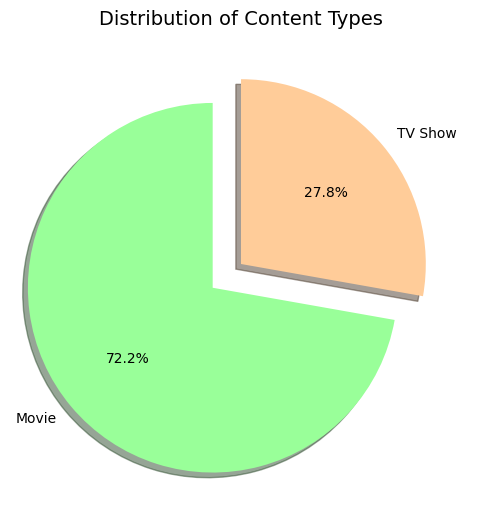

In [ ]:
# Graphical Analysis
# We can use a count plot to get the counts of each category
colors = ['#99ff99','#ffcc99'] #['#ff9999','#66b3ff'] these are two more color codes we can use
explode = (0.2, 0)
plt.figure(figsize=(8, 6))
plt.pie(content_df['count'], explode=explode, labels=content_df['type'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Content Types', fontsize=14)
plt.show()

**Insights:**

1.There are more movies than TV shows on the platform with movies 72.2% and TV shows 27.8%
(approximately 2.3 times more movies than TV shows).

2.The platform may have a stronger focus on movie content compared to TV shows.


**Recomendations:**

While there are more movies currently available, consider expanding TV show offerings strategically.

**'Cast' variable**

In [ ]:
#Non-Graphical Values
tv_actors_df = df[df['type'] == 'TV Show']
tv_actors_df = tv_actors_df.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(11)
movie_actors_df = df[df['type'] == 'Movie']
movie_actors_df = df.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(11)
print('TV Show Actors')
print(tv_actors_df[1:])
print()
print('Movie Actors')
print(movie_actors_df[1:])

TV Show Actors
                  cast  unique_count
1     Takahiro Sakurai            24
2            Yuki Kaji            17
3       Junichi Suwabe            17
4            Ai Kayano            17
5          Daisuke Ono            14
6   David Attenborough            14
7      Takehito Koyasu            13
8     Yoshimasa Hosoya            13
9      Yuichi Nakamura            13
10       Kana Hanazawa            12

Movie Actors
                 cast  unique_count
1         Anupam Kher            39
2        Rupa Bhimani            31
3    Takahiro Sakurai            30
4       Julie Tejwani            28
5             Om Puri            27
6         Rajesh Kava            26
7      Shah Rukh Khan            26
8         Boman Irani            25
9        Paresh Rawal            25
10          Yuki Kaji            25


<ipython-input-97-ce788d05d212>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_movie = sns.barplot(ax=axes[0], x='cast', y='unique_count', data=movie_actors_df[1:], palette=seagreen_palette)
<ipython-input-97-ce788d05d212>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_tv = sns.barplot(ax=axes[1], x='cast', y='unique_count', data=tv_actors_df[1:], palette=orange_palette)


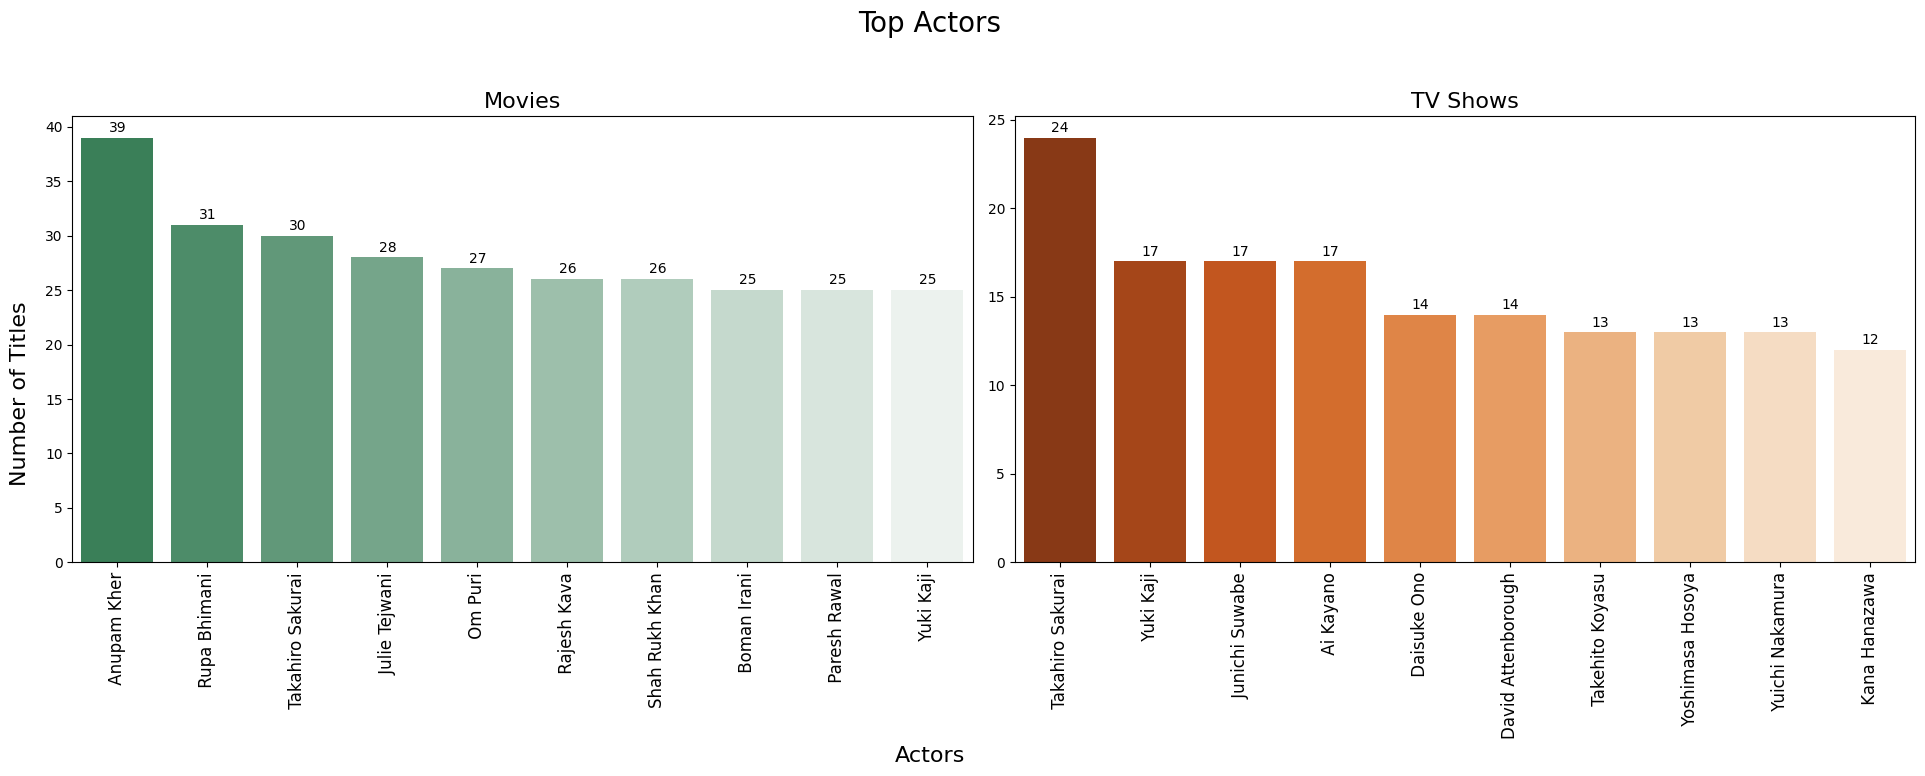

In [ ]:
# Graphical Analysis
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Top Actors", fontsize=20)

seagreen_palette = sns.light_palette("seagreen", n_colors=len(movie_actors_df) - 1, reverse=True)
bar_plot_movie = sns.barplot(ax=axes[0], x='cast', y='unique_count', data=movie_actors_df[1:], palette=seagreen_palette)
axes[0].set_title('Movies', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', labelrotation=90, labelsize=12)

for container in bar_plot_movie.containers:
    bar_plot_movie.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=10)

orange_palette = sns.color_palette("Oranges", n_colors=len(tv_actors_df) - 1)[::-1]
bar_plot_tv = sns.barplot(ax=axes[1], x='cast', y='unique_count', data=tv_actors_df[1:], palette=orange_palette)
axes[1].set_title('TV Shows', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', labelrotation=90, labelsize=12)

for container in bar_plot_tv.containers:
    bar_plot_tv.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=10)

fig.text(0.5, 0.04, 'Actors', ha='center', fontsize=16)

fig.text(0.04, 0.5, 'Number of Titles', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()

**Insights:**

1.The top actors in movies are Anupam Kher, Rupa Bhimani, Takahiro Sakurai. Most of the actors are from bollywood.

2.Bollywood movies featuring these actors often have a significant international audience, contributing to global viewer engagement on the platform.

3.Presensse of top actors in TV Show suggests a strong focus on anime or animated TV shows on the platform.

**Recomendations:**

Highlight top actors and suggest those movies regularly to attract subscribers
Expand dashboard with popular Japanese TV shows which includes animes.

# **'Directors' Variable**

In [ ]:
#Non-Graphical Values
director_df = df.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index(name='unique_count').head(11)
director_df[1:]

,director,unique_count
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


<ipython-input-101-2908809571c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='director', y='unique_count', data=director_df[1:], palette=rocket_pallet)


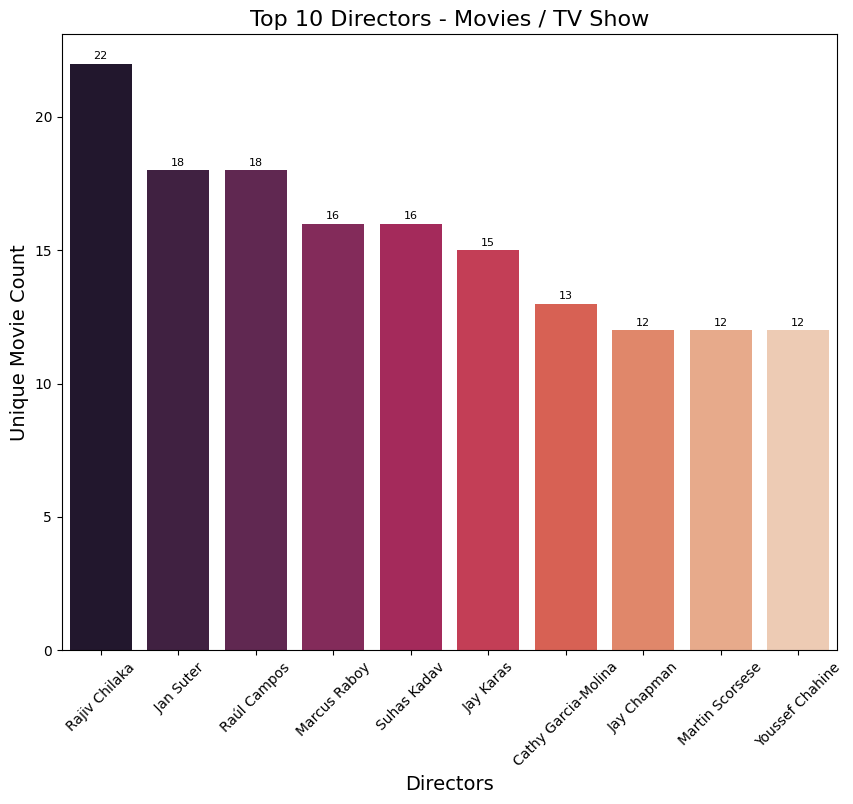

In [ ]:
#Graphical Analysis
plt.figure(figsize=(10,8))
rocket_pallet = sns.color_palette("rocket", n_colors=len(df.head(10).head(10)))

bar_plot = sns.barplot(x='director', y='unique_count', data=director_df[1:], palette=rocket_pallet)

plt.title('Top 10 Directors - Movies / TV Show', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Unique Movie Count', fontsize=14)
plt.xticks(rotation=45)

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=8)

plt.show()

**Insights:**

1.Rajiv Chilaka and Jan Suter are key for kids' cartoons and documentaries.

2.Directors from India, Latin America, the Philippines, USA, and Egypt showcase our diverse content.

3.This platform features diverse directors, offering cartoons, documentaries, comedies, and award-winning films for all audiences.

**Recomendations:**

1.Keep adding new animated shows and movies from Indian directors for kids and families to enjoy.

2.Encourage new directors for fresh content.

# **'Country' Variable**

In [ ]:
#Non-Graphical Values
country_df = df.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index(name='unique_movie_count')
country_df = country_df[country_df['country'] != 'Unknown Country'].reset_index(drop=True)
country_df.head(10)

,country,unique_movie_count
0,United States,3211
1,India,1008
2,United Kingdom,628
3,United States,479
4,Canada,271
5,Japan,259
6,France,212
7,South Korea,211
8,Spain,181
9,France,181


<ipython-input-105-ad0b09af2ed2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='country', y='unique_movie_count', data=top_10_countries, palette='Blues')


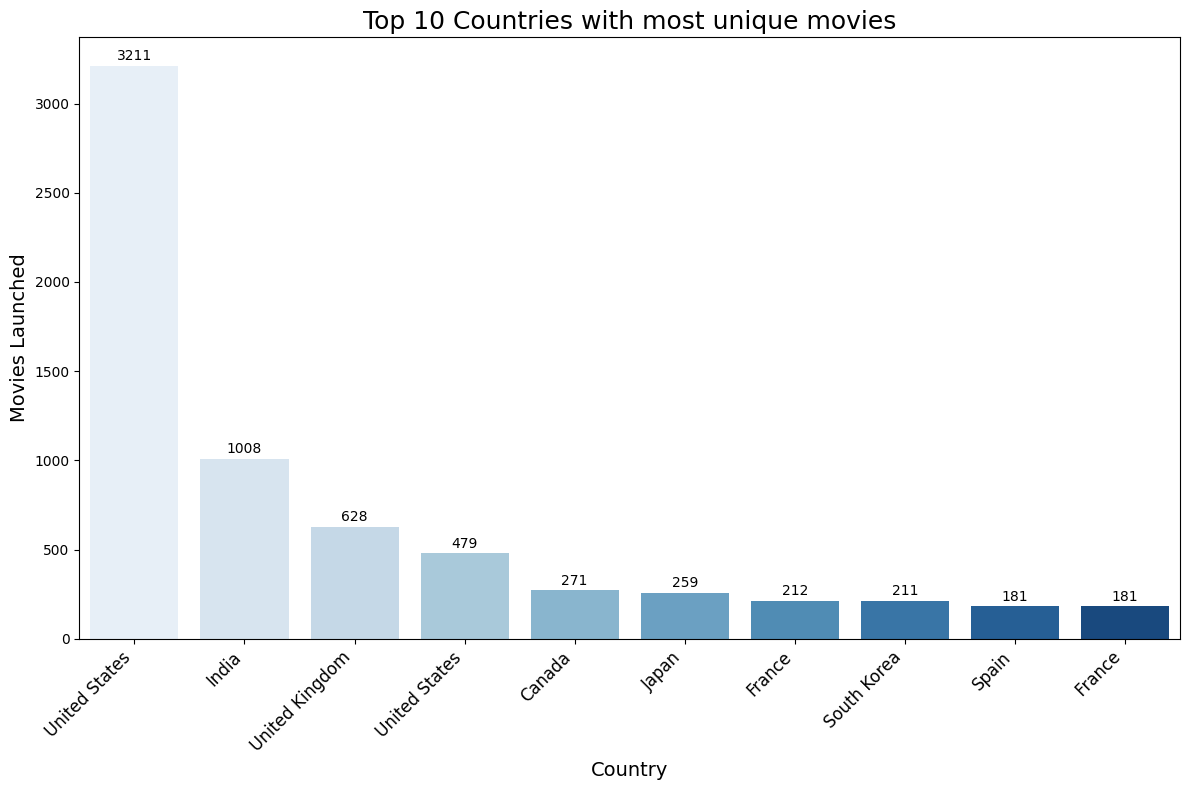

In [ ]:
#Graphical Analysis
top_10_countries = country_df.head(10)

plt.figure(figsize=(12, 8))



bar_plot = sns.barplot(x='country', y='unique_movie_count', data=top_10_countries, palette='Blues')

plt.title('Top 10 Countries with most unique movies', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Movies Launched', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=10)

plt.tight_layout()
plt.show()

**Insights:**

1. Dominance of United States with 3211 unique movies
2.Strong contribution from India with 1008 movie launches showing its substantial contribution to the movie industry.
3.Increase investment in local content in high-viewership regions like India and the UK.
4.Partner with Indian studios for original content in regional languages and cultural preferences.
5.Apart from India, countries like Japan (259) and South Korea (211) also contribute significantly, showcasing the growing influence of Asian countries in global cinema.

**Recomendations:**

1. Invest in Diverse Markets, Focusing on Emerging Markets,Cultural Exchange Programs.
2.Partnerships with regional production houses, content creators, and OTT platforms to co-produce or license content.
3. Upgrade Netflix application to user friendly

**'Genre' or 'Listed-in' Variable **

In [ ]:
tv_df = df[df['type'] == 'TV Show']
tv_df = tv_df.groupby('listed_in')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')

movie_df = df[df['type'] == 'Movie']
movie_df = movie_df.groupby('listed_in')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
print('Movies')
print(movie_df, end='\n\n\n')
print('TV Shows')
print(tv_df)

Movies
                    listed_in  unique_count
0        International Movies          2624
1                      Dramas          1600
2                    Comedies          1210
3          Action & Adventure           859
4               Documentaries           829
5                      Dramas           827
6          Independent Movies           736
7             Romantic Movies           613
8    Children & Family Movies           605
9                   Thrillers           512
10                   Comedies           464
11           Music & Musicals           357
12            Stand-Up Comedy           334
13              Horror Movies           275
14           Sci-Fi & Fantasy           230
15              Sports Movies           218
16       International Movies           128
17               LGBTQ Movies           101
18              Horror Movies            82
19             Classic Movies            80
20                  Thrillers            65
21       Faith & Spiritua

<ipython-input-109-6cac0627bb87>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='listed_in', y='unique_count', data=tv_category_df, palette=tv_palette)
<ipython-input-109-6cac0627bb87>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='listed_in', y='unique_count', data=movie_category_df, palette=movie_palette_reverse)


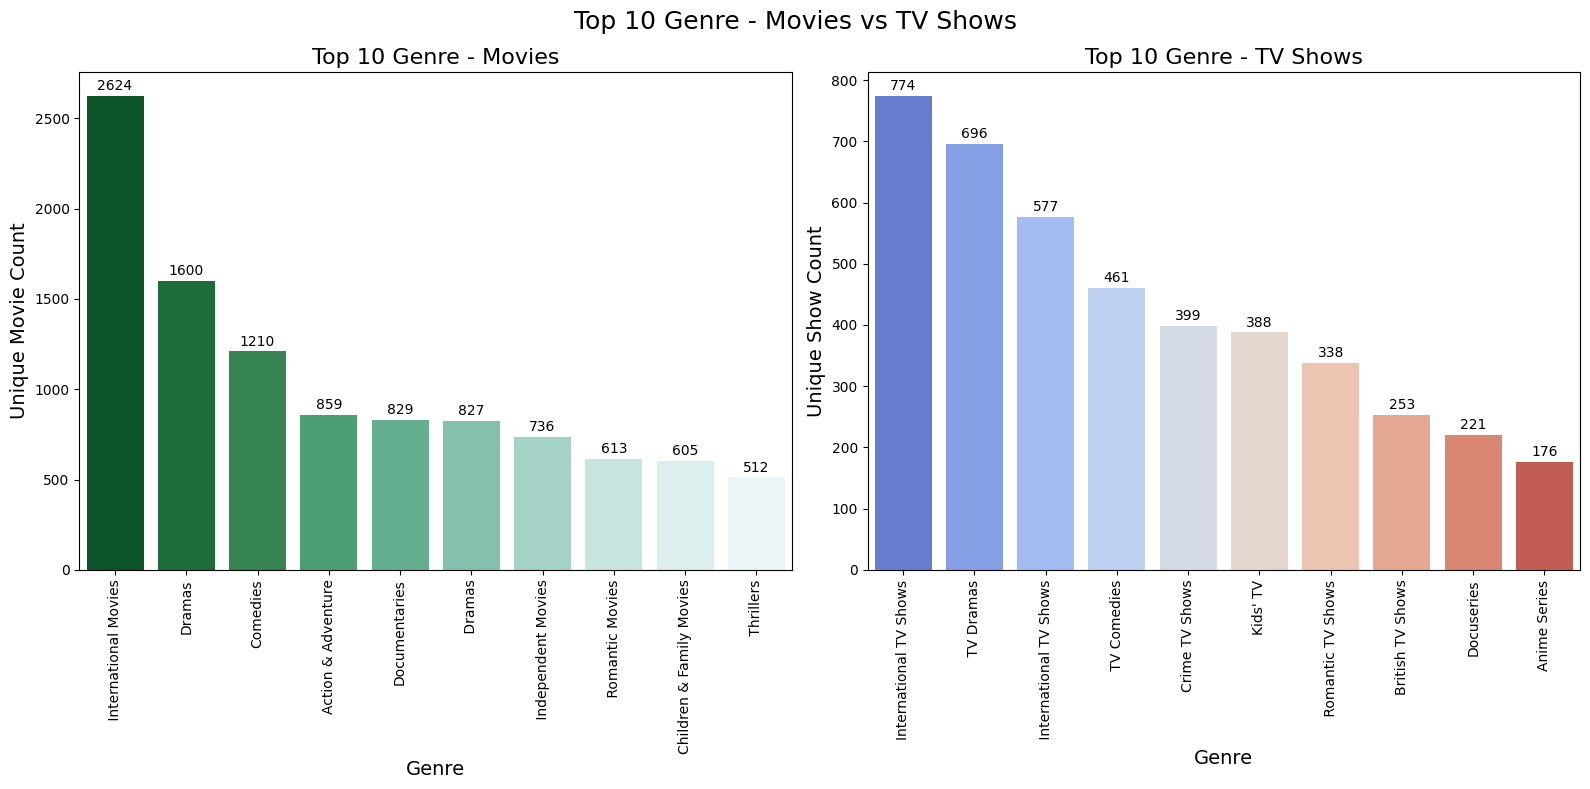

In [ ]:
#Graphical Analysis
tv_category_df = tv_df.head(10)
movie_category_df = movie_df.head(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

tv_palette = sns.color_palette("coolwarm", n_colors=len(tv_category_df))
movie_palette = sns.color_palette("BuGn", n_colors=len(movie_category_df))
movie_palette_reverse = movie_palette[::-1]

sns.barplot(ax=axes[1], x='listed_in', y='unique_count', data=tv_category_df, palette=tv_palette)
axes[1].set_title('Top 10 Genre - TV Shows', fontsize=16)
axes[1].set_xlabel('Genre', fontsize=14)
axes[1].set_ylabel('Unique Show Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

sns.barplot(ax=axes[0], x='listed_in', y='unique_count', data=movie_category_df, palette=movie_palette_reverse)
axes[0].set_title('Top 10 Genre - Movies', fontsize=16)
axes[0].set_xlabel('Genre', fontsize=14)
axes[0].set_ylabel('Unique Movie Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

fig.suptitle('Top 10 Genre - Movies vs TV Shows', fontsize=18)

for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge', fontsize=10, padding=2)

for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', fontsize=10, padding=2)

plt.tight_layout()
plt.show()

**Insights:**

1.There is a significant demand for international content:
"International Movies" lead with 2624 unique titles. "International TV Shows" top the list with 774 unique shows.

2.Popularity of Dramas:
"Dramas" rank second with 1600 unique titles."TV Dramas" are also prominent with 693 unique shows.

3.Interest in Documentaries:
"Documentaries" have a solid presence with 829 titles."Docuseries" are also popular with 221 unique shows.


**Recomendations:**

1.Promote these international shows and movies to appeal to viewers interested in diverse perspectives.

2.Produce original dramas with compelling stories and strong characters.

3.Develop family-friendly comedy shows and movies for joy and laughter.

# **'Rate' Variable**

In [ ]:
#Non-Graphical Values
movie_rating_df = df[df['type'] == 'Movie']
movie_rating_df = movie_rating_df.groupby('rating')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(10)

movie_rating_df = movie_rating_df.head()

tv_rating_df = df[df['type'] == 'TV Show']
tv_rating_df = tv_rating_df.groupby('rating')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(10)
tv_rating_df = tv_rating_df.head()

print('Movie Rating')
print(movie_rating_df,end='\n\n\n')

print('TV Rating')
print(tv_rating_df)

Movie Rating
  rating  unique_count
0  TV-MA          2062
1  TV-14          1427
2      R           797
3  TV-PG           540
4  PG-13           490


TV Rating
  rating  unique_count
0  TV-MA          1145
1  TV-14           733
2  TV-PG           323
3  TV-Y7           195
4   TV-Y           176


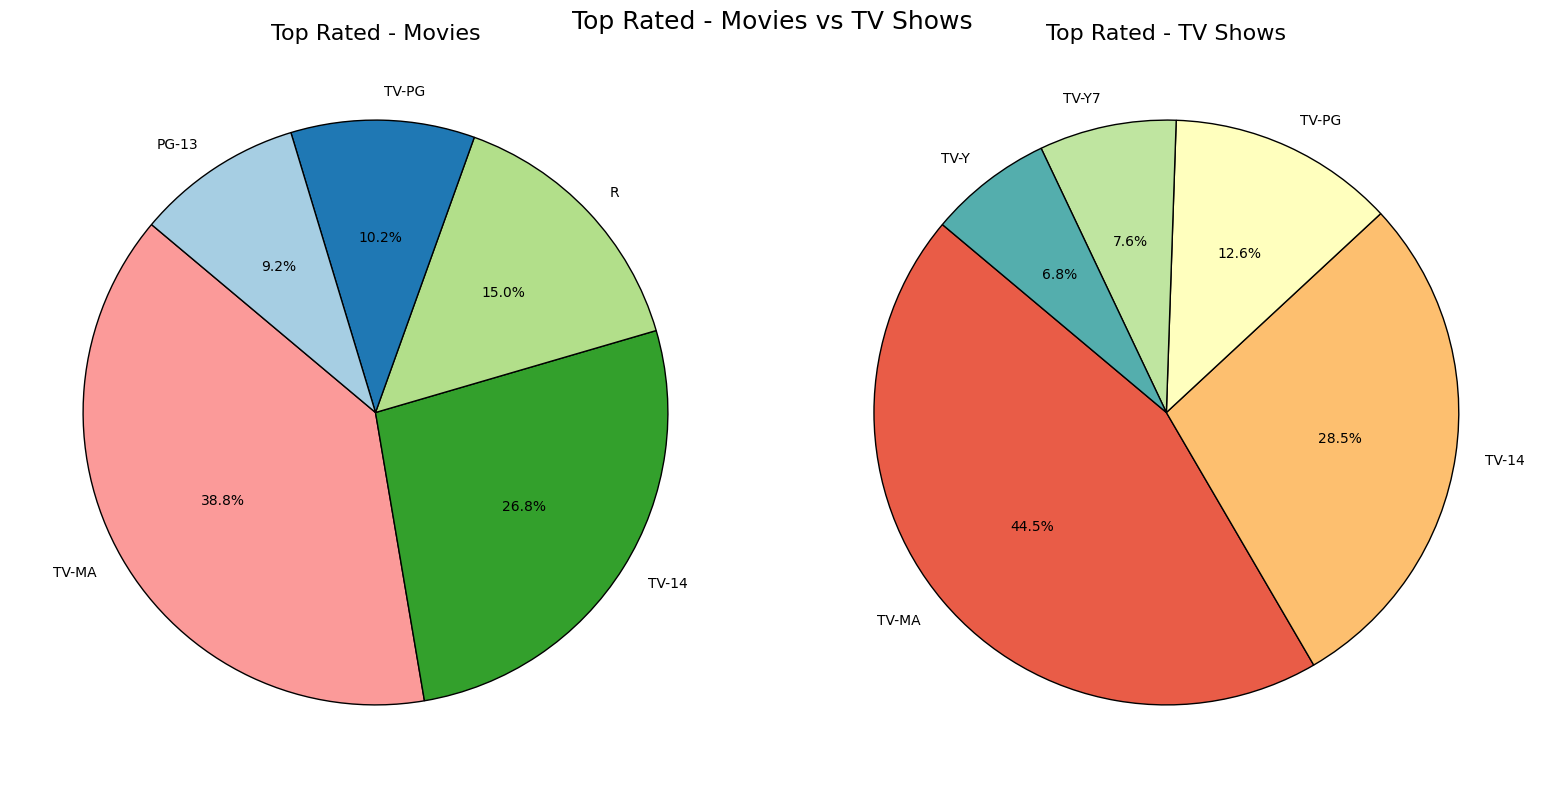

In [ ]:
#Graphical
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

tv_palette = sns.color_palette("Spectral", n_colors=len(tv_rating_df))
movie_palette = sns.color_palette("Paired", n_colors=len(movie_rating_df))
movie_palette_reverse = movie_palette[::-1]

axes[1].pie(tv_rating_df['unique_count'], labels=tv_rating_df['rating'], autopct='%1.1f%%', colors=tv_palette,
            startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Top Rated - TV Shows', fontsize=16)

axes[0].pie(movie_rating_df['unique_count'], labels=movie_rating_df['rating'], autopct='%1.1f%%', colors=movie_palette_reverse,
            startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Top Rated - Movies', fontsize=16)

fig.suptitle('Top Rated - Movies vs TV Shows', fontsize=18)

plt.tight_layout()
plt.show()

**Insights:**

1."TV-MA (Mature Audience Only)" is the most common movie rating, intended for mature audiences with 38.8%

2.TV-14 (Parents Strongly Cautioned):The second most common rating, cautioning content unsuitable for children under 14 with 26.8%

3.R (Restricted):Restricted to viewers 17 and older; may contain strong language, violence, or explicit scenes.

**Recomendations:**

1.Create more family-friendly movies (PG, PG-13) for a broader audience.
Adding more TV-Y and TV-Y7 content could attract younger audiences and families, expanding your viewership.

2.Focus marketing on TV-MA and TV-14 categories to attract viewers who prefer mature content. Highlight popular and new releases in these ratings.


# **'Release Year' Variable**

In [ ]:
#Non-Graphical Values
movie_release_df = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000)]
movie_release_df = movie_release_df.groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(25)
tv_release_df = df[(df['type'] == 'TV Show') & (df['release_year'] >=2000)]
tv_release_df = tv_release_df.groupby('release_year')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(25)

print('Movies Released from 2000')
print(movie_release_df, end='\n\n')
print('TV Show Released from 2000')
print(tv_release_df)

Movies Released from 2000
    release_year  unique_count
0           2018           767
1           2017           767
2           2016           658
3           2019           633
4           2020           517
5           2015           398
6           2021           277
7           2014           264
8           2013           225
9           2012           173
10          2010           154
11          2011           145
12          2009           118
13          2008           113
14          2006            82
15          2007            74
16          2005            67
17          2004            55
18          2003            51
19          2002            44
20          2001            40
21          2000            33

TV Show Released from 2000
    release_year  unique_count
0           2020           436
1           2019           397
2           2018           380
3           2021           315
4           2017           265
5           2016           244
6           2015

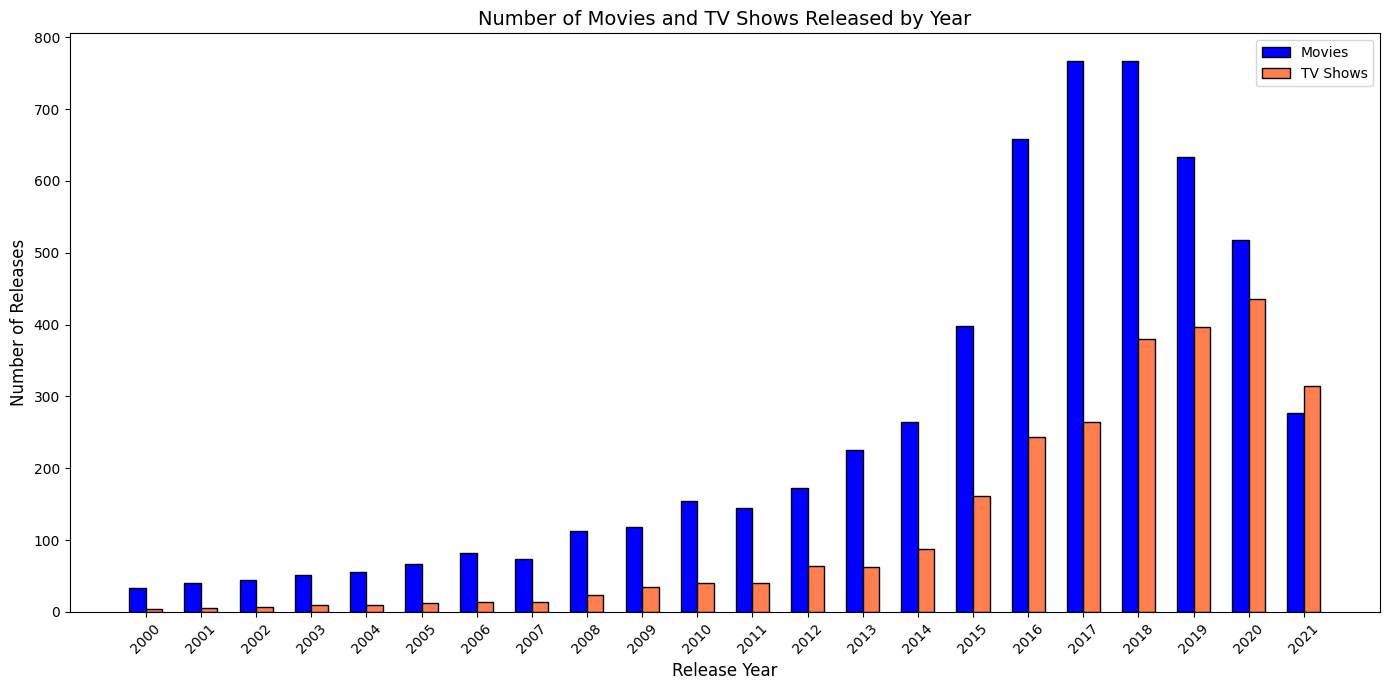

In [ ]:
#Graphical Analaysis
bar_width = 0.3
movie_release_df = movie_release_df.sort_values(by='release_year')
tv_release_df = tv_release_df.sort_values(by='release_year')
years = movie_release_df['release_year']

r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(14, 7))
ax = plt.gca()

bars1 = ax.bar(r1, movie_release_df['unique_count'], color='Blue', width=bar_width, edgecolor='black', label='Movies')

bars2 = ax.bar(r2, tv_release_df['unique_count'], color='coral', width=bar_width, edgecolor='black', label='TV Shows')

ax.set_xlabel('Release Year', fontsize=12)
ax.set_ylabel('Number of Releases', fontsize=12)
ax.set_title('Number of Movies and TV Shows Released by Year', fontsize=14)

ax.set_xticks([r + bar_width / 2 for r in range(len(years))])
ax.set_xticklabels(years, rotation=45)
ax.legend()
plt.tight_layout()

# Show plot
plt.show()

**Insights:**

1.In recent years, especially from 2017 to 2020, there were many more movies and TV shows released. Because more live streaming content became popular at that time only.

2.Since 2019, there have been fewer new movies due to disruptions like the COVID-19 pandemic. TV shows, however, have kept releasing new episodes, showing they can adapt.

3.Viewers are increasingly favoring newer content, with the most releases happening in recent years. Older content, especially from before the 2010s, is becoming less available and may be less popular.

**Recommendations:**

1.Promote and analyze content from 2017 to 2020 to understand viewer preferences and capitalize on their popularity for movies and TV shows.

2.Use resources wisely and team up with others to handle the ups and downs in making movies after 2019, while keeping new movies coming.

# **'Duration' Variable**

In [ ]:
#Non-Graphical Values
movie_length_df = df[df['type'] == 'Movie']
movie_length_df = movie_length_df.groupby('duration')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
movie_length_df.head(20)

tv_length_df = df[df['type'] == 'TV Show']
tv_length_df = tv_length_df.groupby('duration')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
tv_length_df

print('Duration for movies')
print(movie_length_df.head(20), end='\n\n')
print('Duration for TV shows')
print(tv_length_df)

Duration for movies
    duration  unique_count
0         90           152
1         93           146
2         94           146
3         97           146
4         91           144
5         95           137
6         96           130
7         92           129
8        102           122
9         98           120
10        99           118
11        88           116
12       101           116
13       103           114
14       106           111
15       100           108
16        89           106
17       104           104
18        86           103
19        87           101

Duration for TV shows
    duration  unique_count
0          1          1793
1          2           425
2          3           199
3          4            95
4          5            65
5          6            33
6          7            23
7          8            17
8          9             9
9         10             7
10        13             3
11        11             2
12        12             2
13        15

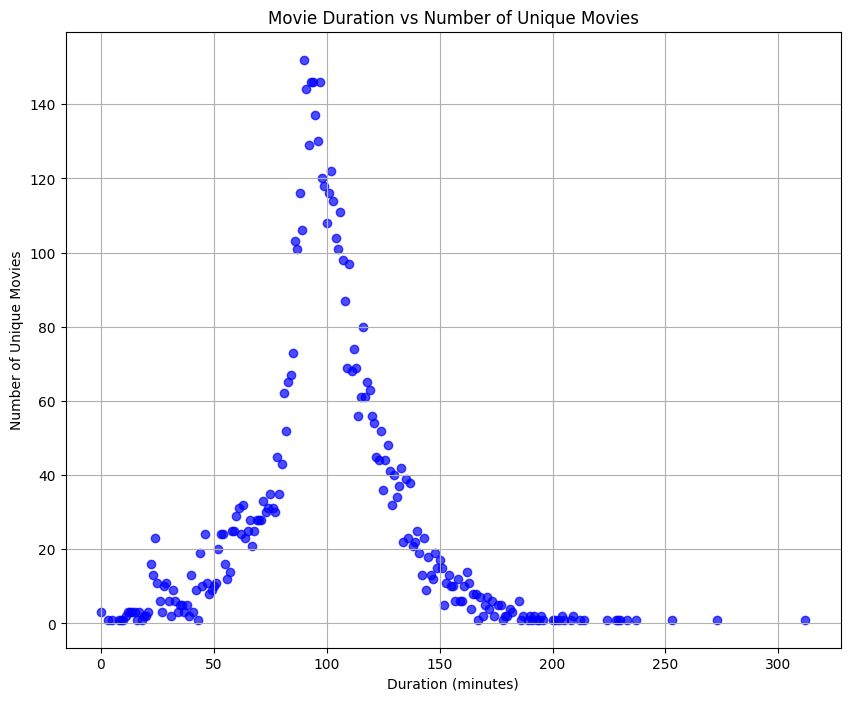

In [ ]:
#Graphical Analysis for Movies
plt.figure(figsize=(10, 8))
plt.scatter(movie_length_df['duration'], movie_length_df['unique_count'], marker='o', color='b', alpha=0.7)
plt.title('Movie Duration vs Number of Unique Movies')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Unique Movies')
plt.grid(True)
plt.show()

**Insights:**

1.Distribution of Movie Durations:
Movie durations range widely, from 0 to 312 minutes. Most movies are around 90 to 97 minutes long.

2.Variability in Movie Counts:
Durations around 90 to 97 minutes are more common, while others are less so, suggesting niche or less frequently produced lengths.

3.No Clear Pattern of Duration Preference:
Movie durations show no consistent pattern of significantly more or fewer movies. This variability suggests diverse audience preferences, genre needs, and individual production decisions influence movie length.

**Recommendations:**

1.Optimize Content Length:
Focus on producing content within popular durations (e.g., 90-97 minutes) to attract a larger audience.

2.Explore Genre-specific Trends:
Analyze genre trends for optimal content creation strategies.

3.Monitor Audience Engagement:
Track audience feedback and engagement to refine content duration strategies effectively.

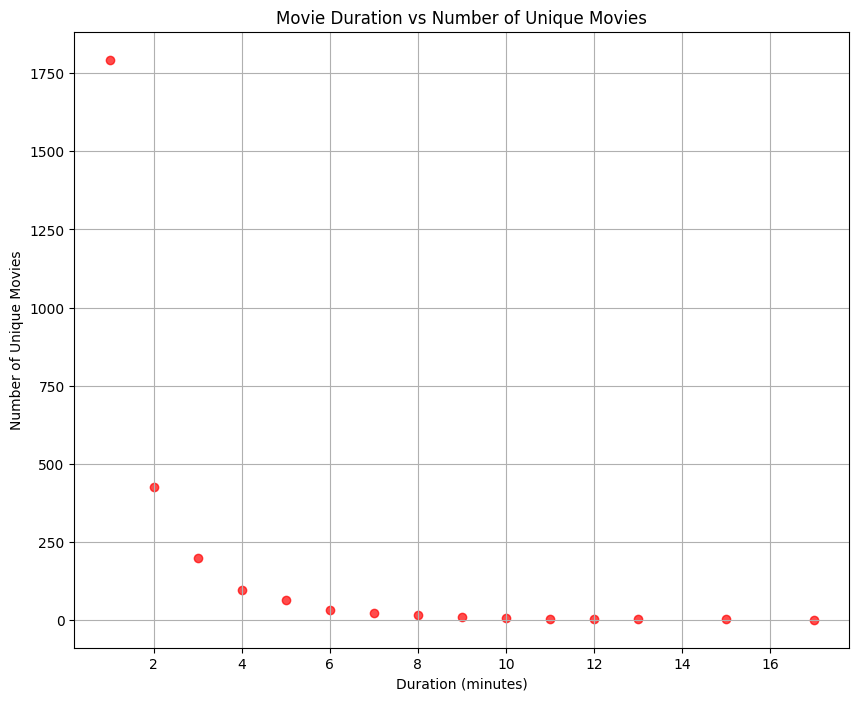

In [ ]:
#Graphical Analysis for TV shows
plt.figure(figsize=(10, 8))
plt.scatter(tv_length_df['duration'], tv_length_df['unique_count'], marker='o', color='r', alpha=0.7)
plt.title('Movie Duration vs Number of Unique Movies')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Unique Movies')
plt.grid(True)
plt.show()

**Insights:**

1.Distribution of TV Show Seasons:
TV show seasons range widely, from 0 to 17. Many shows have just 1 season, with fewer as seasons increase.

2.Variability in TV Show Counts:
TTV show counts vary significantly by season length. 1-3 seasons are more common, reflecting shorter series. Longer runs (4+ seasons) are less common.

3.Longevity and Viewer Retention:
Longer-running TV shows suggest sustained viewer loyalty.Maintaining interest over multiple seasons is challenging.

**Recommendations:**

1.Produce both shorter and longer TV show seasons. Cater to diverse viewer preferences and optimize viewership.

2.Use data to plan TV show renewals based on season length. Evaluate viewer engagement to optimize renewal strategies.

3.Consider producing mini-series or limited-run series.Attract viewers seeking concise storytelling or specific themes.


# **Content Added by Month**

In [ ]:
#Non-Graphical Data
movie_add_month_df = df[df['type'] == 'Movie']
movie_add_month_df = movie_add_month_df.groupby('month_name')['title'].nunique().sort_values(ascending=True).reset_index(name='unique_count')
tv_add_month_df = df[df['type'] == 'TV Show']
tv_add_month_df = tv_add_month_df.groupby('month_name')['title'].nunique().sort_values(ascending=True).reset_index(name='unique_count')
print()
print('Movie Content Added by Month',end='\n')
print(movie_add_month_df, end='\n\n')

print('TV Show Content Added by Month', end='\n')

print(tv_add_month_df)


Movie Content Added by Month
   month_name  unique_count
0    February           382
1         May           439
2        June           492
3    November           498
4      August           519
5   September           519
6       March           529
7     October           545
8     January           546
9    December           547
10      April           550
11       July           565

TV Show Content Added by Month
   month_name  unique_count
0    February           183
1     January           192
2         May           195
3    November           207
4       March           214
5       April           215
6     October           216
7      August           236
8        June           237
9   September           253
10       July           262
11   December           266


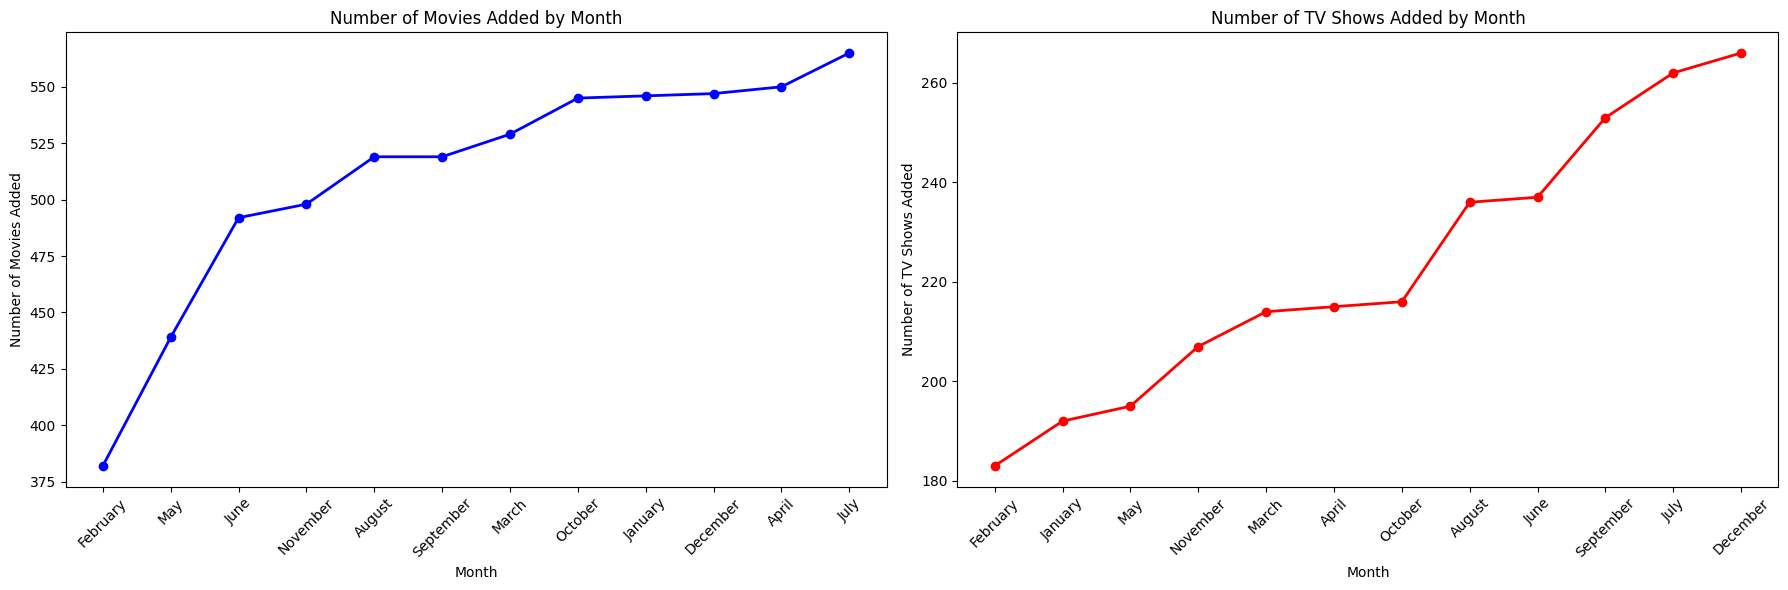

In [ ]:
#Graphical Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(movie_add_month_df['month_name'], movie_add_month_df['unique_count'], marker='o', linestyle='-',
         color='Blue', linewidth=2)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Movies Added')
ax1.set_title('Number of Movies Added by Month')

ax1.set_xticks(range(len(movie_add_month_df['month_name'])))
ax1.set_xticklabels(movie_add_month_df['month_name'], rotation=45)

ax2.plot(tv_add_month_df['month_name'], tv_add_month_df['unique_count'], marker='o', linestyle='-',
         color='Red', linewidth=2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of TV Shows Added')
ax2.set_title('Number of TV Shows Added by Month')

# Set x-axis tick labels and rotation for ax2
ax2.set_xticks(range(len(tv_add_month_df['month_name'])))
ax2.set_xticklabels(tv_add_month_df['month_name'], rotation=45)

plt.tight_layout()

plt.show()

**Insights:**

1.Both movies and TV shows vary monthly in releases, peaking in July, April, and December.

2.February shows the lowest movie releases, suggesting an industry trend for reduced output.

3.TV show releases vary, with peaks in months like July, April, and December, possibly due to seasonal programming strategies.

4.Movies and TV shows exhibit diverse monthly release patterns.

**Recommendations:**

Strategically release movies in peak months for audience engagement.
Consider releasing content in months like February and May
Monitor trends and competitors for strategic releases.
Market based on seasonal habits and audience preferences.

# **Content Added by Year**

In [ ]:
#Non-Graphical Values
movie_add_year_df = df[df['type'] == 'Movie']
movie_add_year_df = movie_add_year_df.groupby('year')['title'].nunique().sort_values(ascending=True).reset_index(
    name='unique_count')

tv_add_year_df = df[df['type'] == 'TV Show']
tv_add_year_df = tv_add_year_df.groupby('year')['title'].nunique().sort_values(ascending=True).reset_index(
    name='unique_count')
print()
print('Movie Content Added by Year',end='\n')
print(movie_add_year_df, end='\n\n')

print('TV Show Content Added by Year', end='\n')

print(tv_add_year_df)


Movie Content Added by Year
    year  unique_count
0   2008             1
1   2010             1
2   2009             2
3   2012             3
4   2013             6
5   2011            13
6   2014            19
7   2015            56
8   2016           253
9   2017           839
10  2021           993
11  2018          1237
12  2020          1284
13  2019          1424

TV Show Content Added by Year
   year  unique_count
0  2008             1
1  2013             5
2  2014             5
3  2015            26
4  2016           177
5  2017           354
6  2018           415
7  2021           505
8  2019           593
9  2020           595


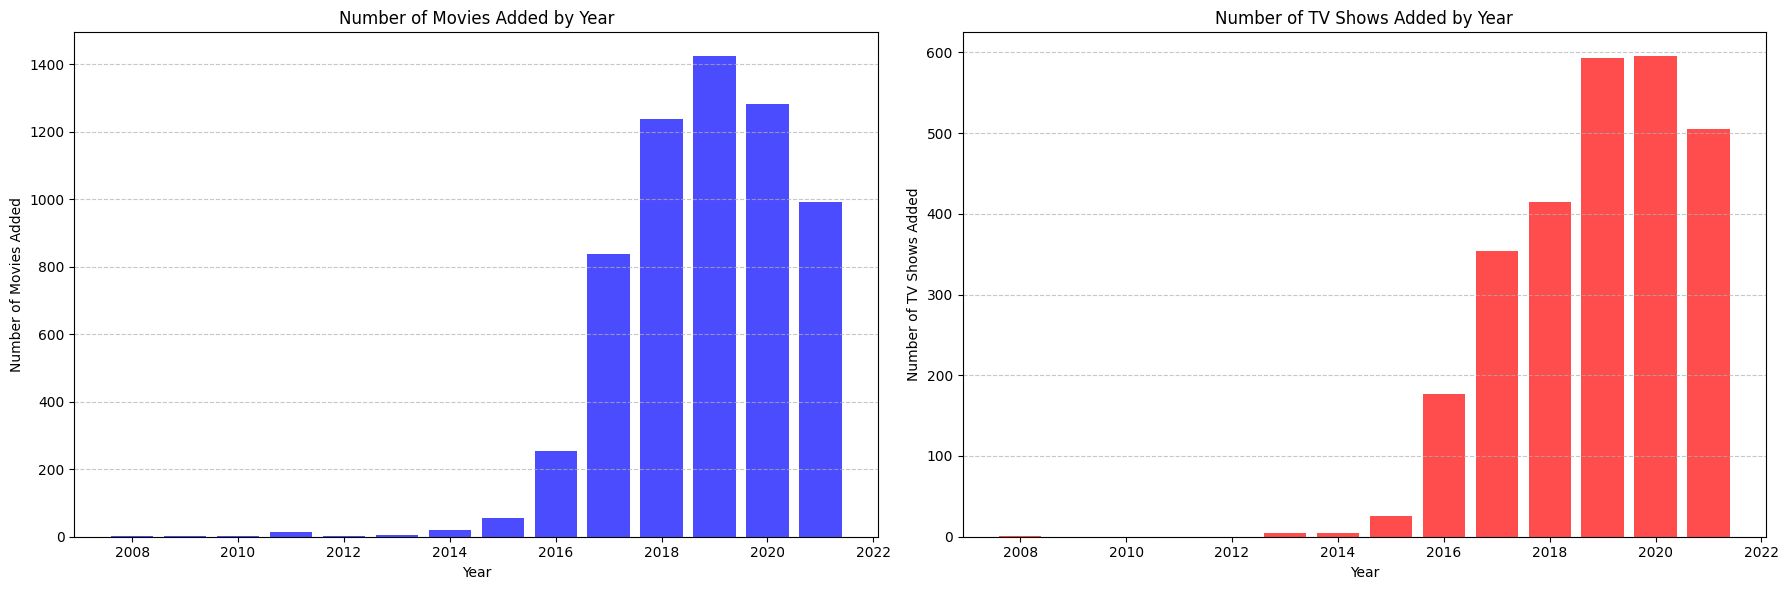

In [ ]:
#Graphical Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.bar(movie_add_year_df['year'], movie_add_year_df['unique_count'], color='Blue', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies Added')
ax1.set_title('Number of Movies Added by Year')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.bar(tv_add_year_df['year'], tv_add_year_df['unique_count'], color='Red', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of TV Shows Added')
ax2.set_title('Number of TV Shows Added by Year')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

**Insights:**

1.Rapid content growth: Many movies and TV shows added annually since 2016.

2.TV Shows Rising: TV shows have grown steadily since 2016, catching up to movies.

3.Peak Years: The years 2018, 2019, and 2020 marked peak periods for content additions, suggesting focused efforts in expanding the platform's content library.

**Recommendations:**

1.Expand content genres and demographics to reach a wider audience.

2.Acquire Popular TV Shows: Increase acquisitions of popular and critically acclaimed TV shows to capitalize on the growing demand for serialized content.

3.Invest in Original Content: Allocate resources towards producing high-quality original movies and TV shows to enhance exclusivity and subscriber retention.


# **2. Comparison of tv shows vs. movies.**

a. Find the number of movies produced in each country and pick the top 10 countries

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,year,month,month_name,week_number,week_name,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2021,9,September,38,Saturday,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,9,September,38,Friday,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,9,September,38,Friday,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,9,September,38,Friday,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,9,September,38,Friday,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#Non-Graphical Data
movie_country_df = df[df['type'] == 'Movie']
movie_country_df = movie_country_df.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
movie_country_df = movie_country_df[movie_country_df['country'] != 'Unknown Country'].head(10)
movie_country_df.reset_index(drop=True, inplace=True)
movie_country_df

,country,unique_count
0,United States,2364
1,India,927
2,United States,388
3,United Kingdom,382
4,Canada,187
5,France,155
6,United Kingdom,152
7,France,148
8,Canada,132
9,Spain,129


<ipython-input-137-5ad82b1dd942>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='country', y='unique_count', data=movie_country_df, palette='colorblind')


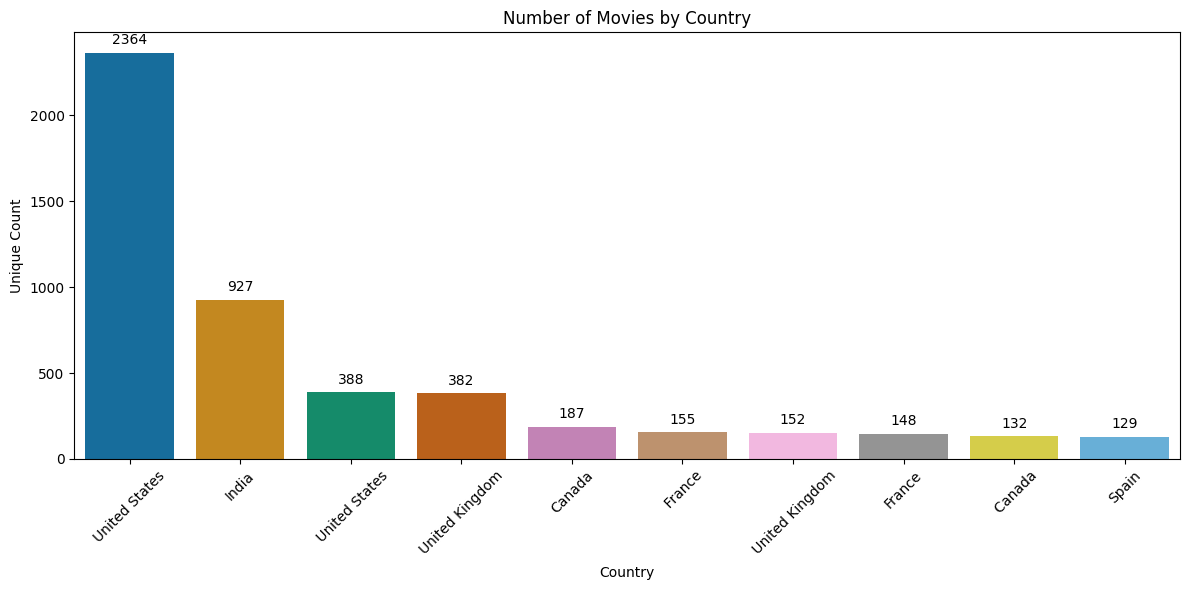

In [ ]:
#Graphical Analysis
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x='country', y='unique_count', data=movie_country_df, palette='colorblind')

plt.xticks(rotation=45)

plt.xlabel('Country')
plt.ylabel('Unique Count')
plt.title('Number of Movies by Country')

for index, row in movie_country_df.iterrows():
    bar_plot.text(row.name, row.unique_count + 50, round(row.unique_count, 2), color='black', ha="center")

plt.tight_layout()
plt.show()

**Insights:**

1.U.S. leads with 2364 movies.
India ranks second with 927 movies.
Europe collectively strong with 1188 movies.
Japan and China have low output compared to top countries.

**Recommendations:**

Focus marketing on U.S. and India.
Increase European content acquisition.
Explore more content from Japan and China.
Strengthen partnerships with European producers.

b. Find the number of Tv-Shows produced in each country and pick the top 10 countries

In [ ]:
#Non-Graphical Values
tv_country_df = df[df['type'] == 'TV Show']
tv_country_df = tv_country_df.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
tv_country_df = tv_country_df[tv_country_df['country'] != 'Unknown Country'].head(10)
tv_country_df.reset_index(drop=True,inplace=True)
tv_country_df

,country,unique_count
0,United States,847
1,United Kingdom,246
2,Japan,174
3,South Korea,164
4,United States,91
5,Canada,84
6,India,81
7,Taiwan,70
8,France,64
9,Australia,56


<ipython-input-140-6f20b95b1b94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='country', y='unique_count', data=tv_country_df, palette='pastel')


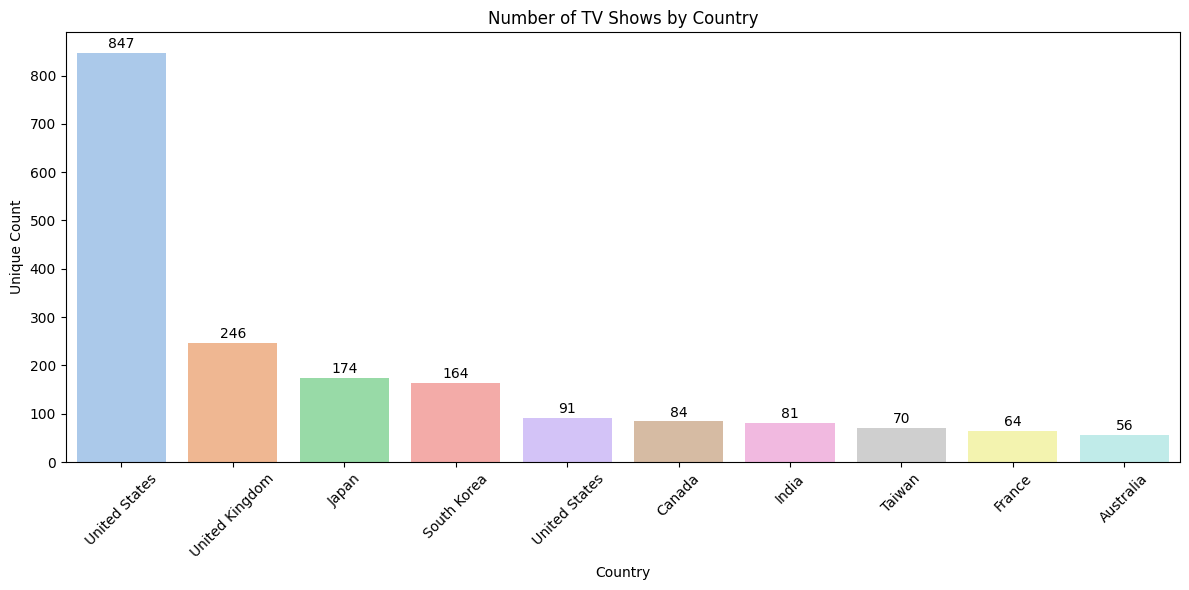

In [ ]:
#Graphical Analysis
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x='country', y='unique_count', data=tv_country_df, palette='pastel')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Unique Count')
plt.title('Number of TV Shows by Country')

for index, row in tv_country_df.iterrows():
    bar_plot.text(row.name, row.unique_count + 10, round(row.unique_count, 2), color='black', ha="center")

plt.tight_layout()

plt.show()

**Insights:**

U.S. leads with 847 TV shows.
United Kingdom follows with 246 TV shows.
Japan and South Korea show significant TV show output.
India, Taiwan, and Australia also contribute TV shows.

**Recommendations:**

Focus marketing efforts in U.S. and UK.
Expand content acquisition in Japan and South Korea.
Develop partnerships to boost Indian TV show offerings.
Explore growth opportunities in Taiwan and Australia.

# **3. What is the best time to launch a TV show?**

a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
#Non-Graphical Values
movie_week_df = df[(df['type'] == 'Movie')]
movie_week_df = movie_week_df.groupby('week_name')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')

tv_week_df = df[(df['type'] == 'TV Show') & (df['release_year'] >=2000)]
tv_week_df = tv_week_df.groupby('week_name')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')

print('Week of Movie')
print(movie_week_df, end='\n\n')
print('Week of TV Show')
print(tv_week_df)

Week of Movie
   week_name  unique_count
0     Friday          1566
1   Thursday          1053
2  Wednesday           906
3    Tuesday           852
4     Monday           628
5     Sunday           569
6   Saturday           557

Week of TV Show
   week_name  unique_count
0     Friday           921
1  Wednesday           376
2    Tuesday           340
3   Thursday           338
4   Saturday           253
5     Monday           220
6     Sunday           179


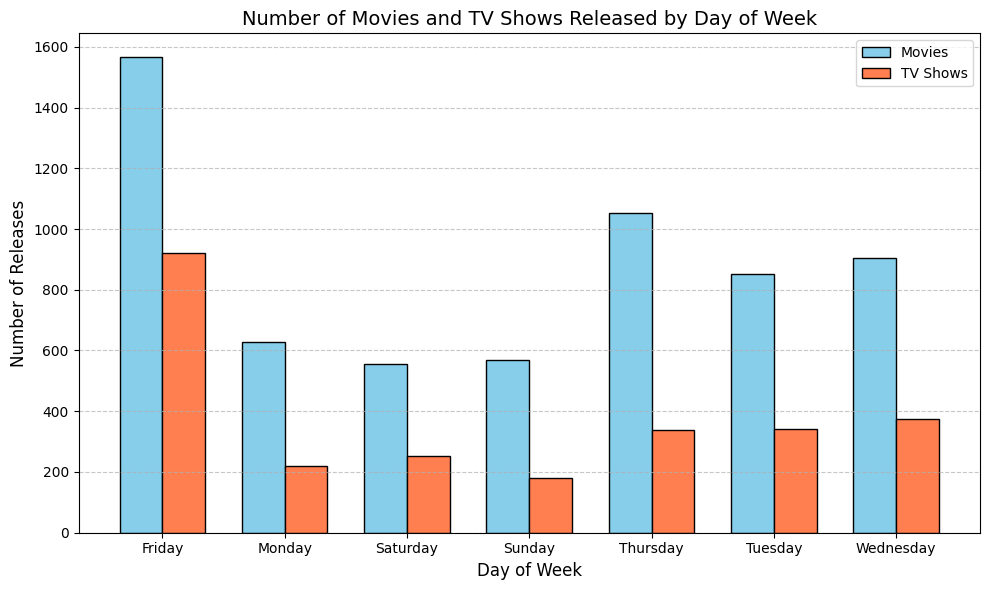

In [ ]:
#Graphical Analysis
movie_week_df = movie_week_df.sort_values(by='week_name')
tv_week_df = tv_week_df.sort_values(by='week_name')

plt.figure(figsize=(10, 6))
ax = plt.gca()

bar_width = 0.35

r1 = np.arange(len(movie_week_df))
r2 = [x + bar_width for x in r1]

bars1 = ax.bar(r1, movie_week_df['unique_count'], color='skyblue', width=bar_width, edgecolor='black', label='Movies')
bars2 = ax.bar(r2, tv_week_df['unique_count'], color='coral', width=bar_width, edgecolor='black', label='TV Shows')

ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Number of Releases', fontsize=12)
ax.set_title('Number of Movies and TV Shows Released by Day of Week', fontsize=14)

plt.xticks([r + bar_width / 2 for r in range(len(movie_week_df))], movie_week_df['week_name'])

ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.legend()

plt.tight_layout()

plt.show()

**Recommendations for Movie Releases:**

Prefer Fridays for maximum audience reach.
Consider Thursdays and Wednesdays for early-week releases.
Optimize marketing efforts around peak release days.
Explore special promotions for weekend releases.

**Recommendations for TV Show Releases:**

Choose Fridays for optimal TV show launches.
Consider mid-week releases on Wednesdays and Tuesdays.
Plan promotions and debuts around peak viewing days.
Adjust release strategies based on target audience behavior.

b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
#Non-Graphical Data
movie_month_df = df[(df['type'] == 'Movie')]
movie_month_df = movie_month_df.groupby('month')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
movie_month_df

print('Month of Movie')
print(movie_month_df, end='\n\n')

tv_month_df = df[(df['type'] == 'TV Show')]
tv_month_df = tv_month_df.groupby('month')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
tv_month_df

print('Month of TV Show')
print(tv_month_df, end='\n\n')

Month of Movie
    month  unique_count
0       7           565
1       4           550
2      12           547
3       1           546
4      10           545
5       3           529
6       8           519
7       9           519
8      11           498
9       6           492
10      5           439
11      2           382

Month of TV Show
    month  unique_count
0      12           266
1       7           262
2       9           253
3       6           237
4       8           236
5      10           216
6       4           215
7       3           214
8      11           207
9       5           195
10      1           192
11      2           183



**Recommendations for Movie Releases:**

Consider July for peak movie release periods.
Plan significant releases in April and December.
Adjust release strategies based on seasonal movie trends.
Utilize summer months for blockbuster releases.

**Recommendations for TV Show Releases:**

Focus on December for optimal TV show launches.
Consider mid-year releases in July and September.
Plan special promotions around peak TV show release months.
Align content strategy with viewer preferences per season.

# **4. Analysis of actors/directors of different types of shows/movies**

a. Identify the top 10 Actors who have appeared in most movies or TV shows.

In [ ]:
#We want you to group by each actor and find the count of unique titles of Tv-shows/movies
# Extracting top movie actors
movie_actors_df = df[df['type'] == 'Movie']
movie_actors_df = movie_actors_df.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(11)
movie_actors_df = movie_actors_df[movie_actors_df['cast'] != 'Unknown Actor']
movie_actors_df.reset_index(drop=True, inplace=True)


# Extracting top TV show actors
tv_actors_df = df[df['type'] == 'TV Show']
tv_actors_df = tv_actors_df.groupby('cast')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(11)
tv_actors_df.reset_index(drop=True, inplace=True)
tv_actors_df = tv_actors_df[tv_actors_df['cast'] != 'Unknown Actor']
tv_actors_df.reset_index(drop=True, inplace=True)

print('Top 10 Movie Actors:')
print(movie_actors_df)

print()

print('Top 10 TV Show Actors:')
print(tv_actors_df)

Top 10 Movie Actors:
              cast  unique_count
0      Anupam Kher            38
1          Om Puri            27
2     Rupa Bhimani            27
3   Shah Rukh Khan            26
4     Paresh Rawal            25
5      Boman Irani            25
6    Julie Tejwani            24
7     Akshay Kumar            23
8      Rajesh Kava            21
9   Kareena Kapoor            20

Top 10 TV Show Actors:
                 cast  unique_count
0    Takahiro Sakurai            24
1           Yuki Kaji            17
2      Junichi Suwabe            17
3           Ai Kayano            17
4         Daisuke Ono            14
5  David Attenborough            14
6     Takehito Koyasu            13
7    Yoshimasa Hosoya            13
8     Yuichi Nakamura            13
9       Kana Hanazawa            12


<ipython-input-147-7ba4b681360e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_movie = sns.barplot(ax=axes[0], x='cast', y='unique_count', data=movie_actors_df, palette=seagreen_palette)
<ipython-input-147-7ba4b681360e>:6: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  bar_plot_movie = sns.barplot(ax=axes[0], x='cast', y='unique_count', data=movie_actors_df, palette=seagreen_palette)
<ipython-input-147-7ba4b681360e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_tv = sns.barplot(ax=axes[1], x='cast', y='unique_count', data=tv_actors_df, palette=blue_palette)
<ipython-input-147-7ba4b681360e>:16: UserWarning: 

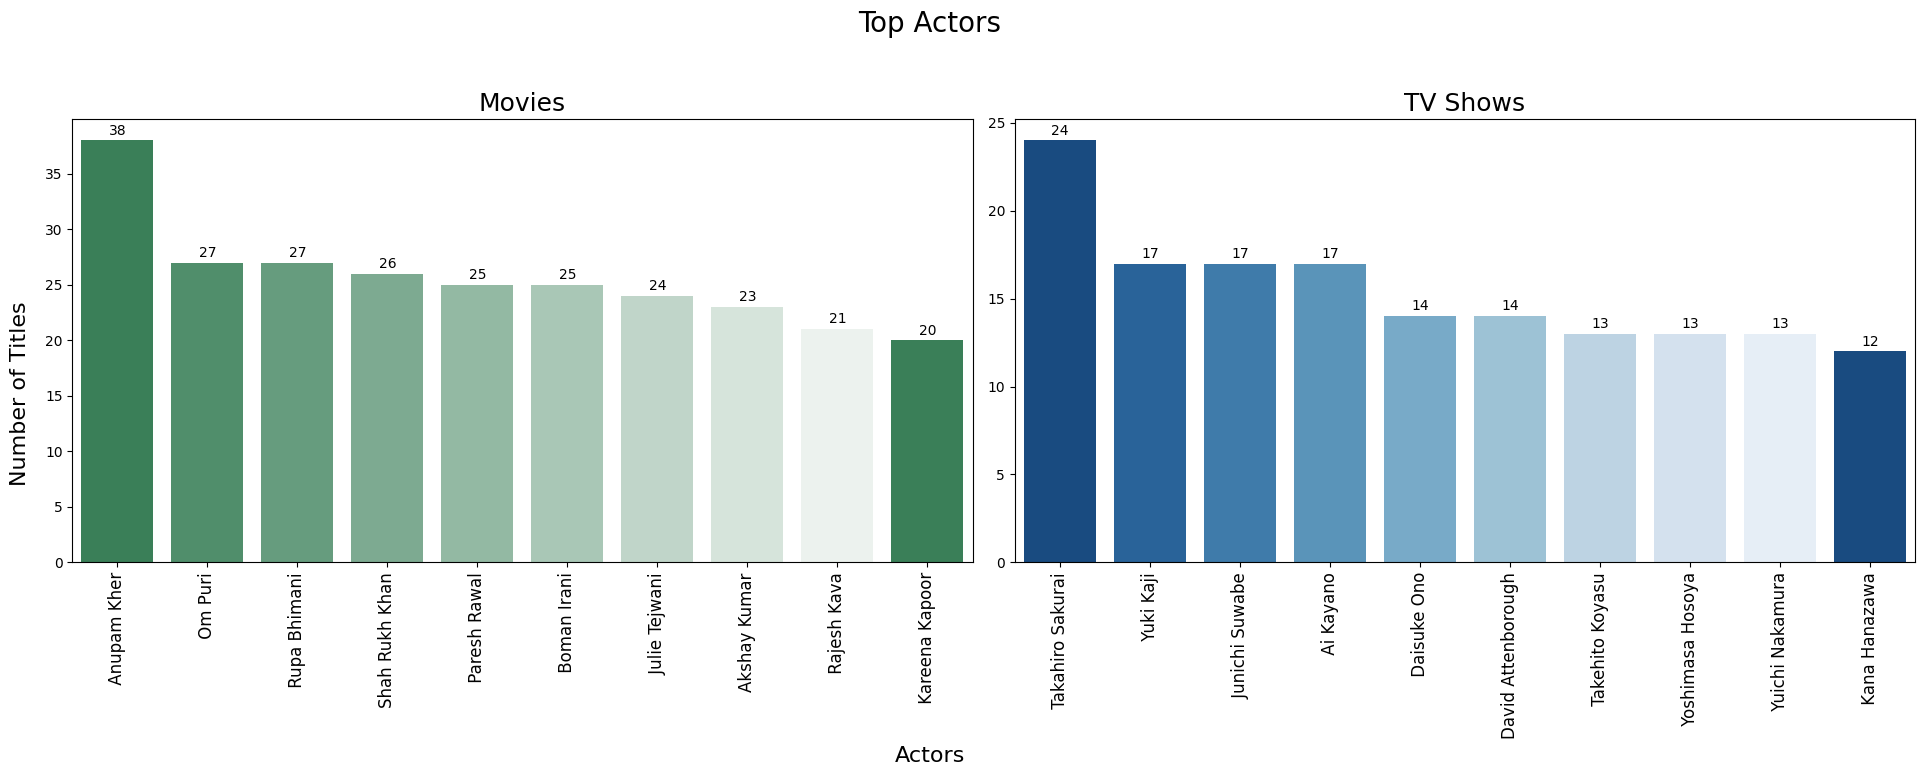

In [ ]:
#Graphical Analysis
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Top Actors", fontsize=20)

seagreen_palette = sns.light_palette("seagreen", n_colors=len(movie_actors_df) - 1, reverse=True)
bar_plot_movie = sns.barplot(ax=axes[0], x='cast', y='unique_count', data=movie_actors_df, palette=seagreen_palette)
axes[0].set_title('Movies', fontsize=18)
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', labelrotation=90, labelsize=12)

for container in bar_plot_movie.containers:
    bar_plot_movie.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=10)

blue_palette = sns.color_palette("Blues", n_colors=len(tv_actors_df) - 1)[::-1]
bar_plot_tv = sns.barplot(ax=axes[1], x='cast', y='unique_count', data=tv_actors_df, palette=blue_palette)
axes[1].set_title('TV Shows', fontsize=18)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', labelrotation=90, labelsize=12)

for container in bar_plot_tv.containers:
    bar_plot_tv.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=10)

fig.text(0.5, 0.04, 'Actors', ha='center', fontsize=16)

fig.text(0.04, 0.5, 'Number of Titles', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Adjust layout to make room for the common axis labels
plt.show()

**Insights for Top Movie Actors:**

Anupam Kher leads with 38 movies.
Rupa Bhimani and Om Puri  follow closely.
Sharuk Khan remains popular with 27 movies.
Several actors have significant movie appearances.

**Recommendations for Movie Actors:**

Collaborate frequently with Anupam Kher and Shah Rukh Khan.
Consider ensemble casts involving Amitabh Bachchan and Naseeruddin Shah.
Explore diverse roles to leverage popularity.
Maximize actors' strengths in varied genres.

**Insights for Top TV Show Actors:**

Takahiro Sakurai tops with 24 TV shows.
Yuki Kaji and Junichi Suwabe are also prominent.
Several actors have a notable presence in multiple TV shows.
Diverse talent in voice acting and on-screen performances.

**Recommendations for TV Show Actors:**

Secure Takahiro Sakurai for lead roles in key TV show projects.
Create opportunities for Yuki Kaji and Junichi Suwabe in new series.
Seek versatile roles for actors with multiple TV show credits.
Explore expanding the talent pool with new collaborations.

b. Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
#We want you to group by each director and find the count of unique titles of Tv-shows/movie
movie_directors_df = df[df['type'] == 'Movie']
movie_directors_df = movie_directors_df.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(11)
movie_directors_df = movie_directors_df[movie_directors_df['director'] != 'Unknown Director']
movie_directors_df.reset_index(drop=True, inplace=True)


# Extracting top TV show actors
tv_director_df = df[df['type'] == 'TV Show']
tv_director_df = tv_director_df.groupby('director')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count').head(11)
tv_director_df.reset_index(drop=True, inplace=True)
tv_director_df = tv_director_df[tv_director_df['director'] != 'Unknown Director']
tv_director_df.reset_index(drop=True, inplace=True)

print('Top 10 Movie Director:')
print(movie_directors_df)

print()

print('Top 10 TV Show Actors:')
print(tv_director_df)

Top 10 Movie Director:
              director  unique_count
0        Rajiv Chilaka            22
1          Raúl Campos            18
2            Jan Suter            18
3          Suhas Kadav            16
4            Jay Karas            15
5         Marcus Raboy            15
6  Cathy Garcia-Molina            13
7          Jay Chapman            12
8      Martin Scorsese            12
9      Youssef Chahine            12

Top 10 TV Show Actors:
                 director  unique_count
0               Ken Burns             3
1     Alastair Fothergill             3
2         Rob Seidenglanz             2
3             Shin Won-ho             2
4              Jung-ah Im             2
5             Stan Lathan             2
6   Gautham Vasudev Menon             2
7           Joe Berlinger             2
8             Hsu Fu-chun             2
9          Iginio Straffi             2


<ipython-input-149-181e944560fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_movie = sns.barplot(ax=axes[0], x='director', y='unique_count', data=movie_directors_df, palette=seagreen_palette)
<ipython-input-149-181e944560fa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_tv = sns.barplot(ax=axes[1], x='director', y='unique_count', data=tv_director_df, palette=blue_palette)


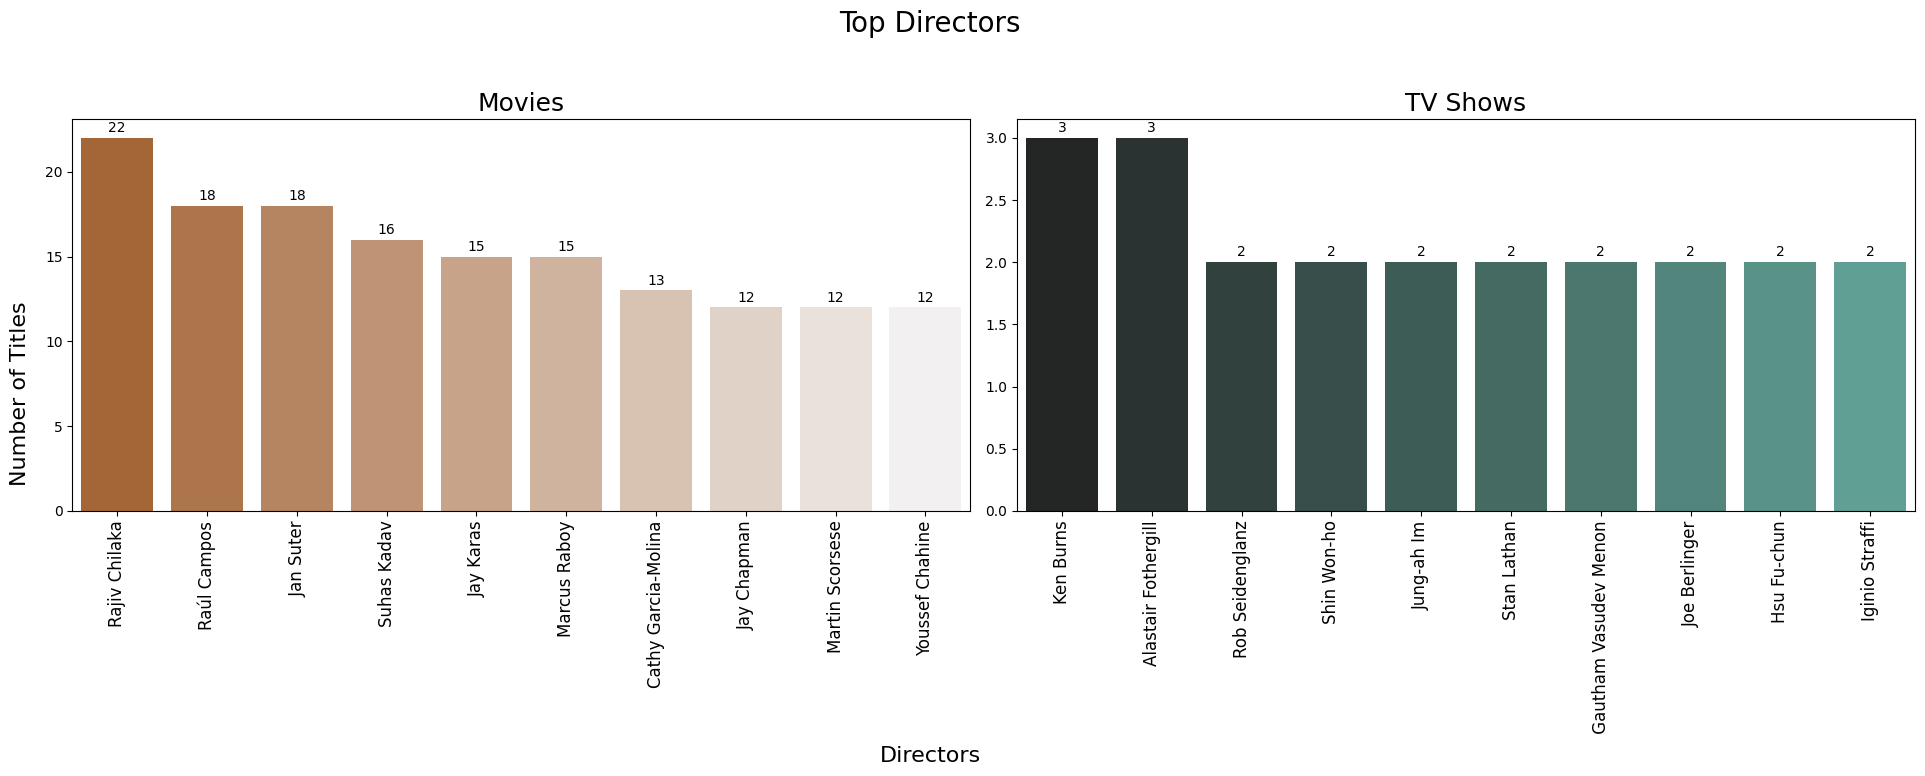

In [ ]:
#Graphical Analysis
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Top Directors", fontsize=20)

seagreen_palette = sns.light_palette("xkcd:copper", n_colors=len(movie_directors_df), reverse=True)
bar_plot_movie = sns.barplot(ax=axes[0], x='director', y='unique_count', data=movie_directors_df, palette=seagreen_palette)
axes[0].set_title('Movies', fontsize=18)
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', labelrotation=90, labelsize=12)

for container in bar_plot_movie.containers:
    bar_plot_movie.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=10)

blue_palette = sns.color_palette("dark:#5A9_r", n_colors=len(tv_director_df))[::-1]
bar_plot_tv = sns.barplot(ax=axes[1], x='director', y='unique_count', data=tv_director_df, palette=blue_palette)
axes[1].set_title('TV Shows', fontsize=18)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', labelrotation=90, labelsize=12)

for container in bar_plot_tv.containers:
    bar_plot_tv.bar_label(container, fmt='%.0f', label_type='edge', padding=2, color='black', fontsize=10)

fig.text(0.5, 0.04, 'Directors', ha='center', fontsize=16)

fig.text(0.04, 0.5, 'Number of Titles', va='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Adjust layout to make room for the common axis labels
plt.show()

**Insights for Top Movie Directors:**

Rajiv Chilaka leads with 22 unique movies.
Jan Suter and Raúl Campos follow closely with 18 movies respectively.
Diverse directors with varied movie outputs.
Presence of established directors like Martin Scorsese.

**Recommendations for Movie Directors:**

Collaborate frequently with top directors like Rajiv Chilaka and Jan Suter.
Explore new projects with Raúl Campos and Suhas Kadav.
Consider diverse genres and styles for Marcus Raboy and Jay Karas.
Utilize the experience of directors like Martin Scorsese for impactful projects.

**Insights for Top TV Show Directors:**

Ken Burns and Alastair Fothergill lead with 3 unique TV shows each.
Several directors have contributed to multiple TV shows.
Notable international presence with directors like Hsu Fu-chun and Shin Won-ho.
Diverse talents in documentary and drama genres.

**Recommendations for TV Show Directors:**

Engage Ken Burns and Alastair Fothergill for documentary series.
Expand opportunities for directors with multiple TV show credits.
Develop partnerships for diverse TV show genres with international directors.
Invest in emerging talents like Gautham Vasudev Menon and Iginio Straffi.

# **5. Which genre movies are more popular or produced more**

In [ ]:
# We want you to apply the word cloud on the genre columns to know which kind of genre is produced
movie_category_df = df[df['type'] == 'Movie']
movie_category_df = movie_category_df.groupby('listed_in')['title'].nunique().sort_values(ascending=False).reset_index(
    name='unique_count')
print('Popular Movie Genre:', end='\n')
print(movie_category_df, end='\n')

Popular Movie Genre:
                    listed_in  unique_count
0        International Movies          2624
1                      Dramas          1600
2                    Comedies          1210
3          Action & Adventure           859
4               Documentaries           829
5                      Dramas           827
6          Independent Movies           736
7             Romantic Movies           613
8    Children & Family Movies           605
9                   Thrillers           512
10                   Comedies           464
11           Music & Musicals           357
12            Stand-Up Comedy           334
13              Horror Movies           275
14           Sci-Fi & Fantasy           230
15              Sports Movies           218
16       International Movies           128
17               LGBTQ Movies           101
18              Horror Movies            82
19             Classic Movies            80
20                  Thrillers            65
21       Fa

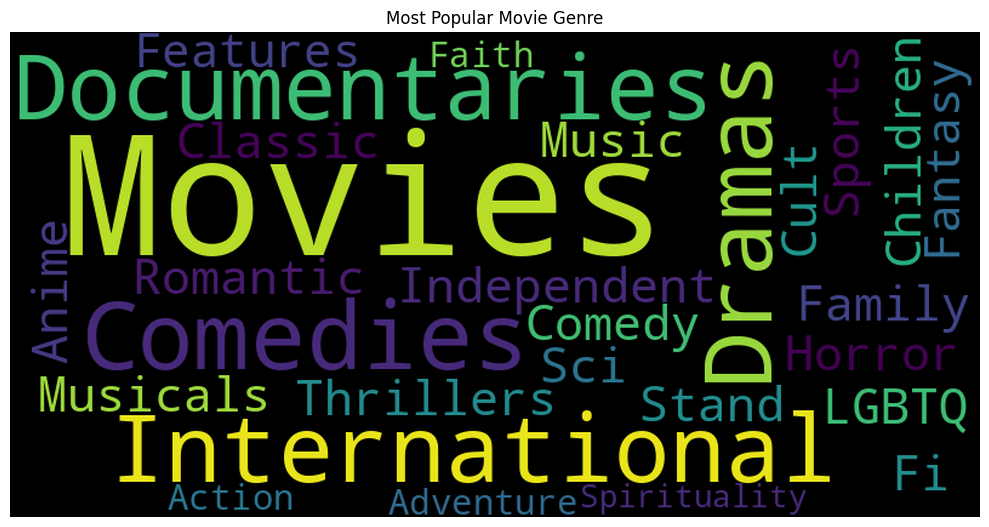

In [ ]:
#Graphical Analysis
# Combine all categories into a single string for movies
movie_categories = ' '.join(movie_category_df['listed_in'].tolist())

# Generate word cloud for movies
movie_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(movie_categories)

# Plot the word cloud for movies
plt.figure(figsize=(10, 10))
plt.imshow(movie_wordcloud, interpolation='spline36')
plt.title('Most Popular Movie Genre')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

**Insights on Popular Movie Genres:**

International Movies lead with 2624 entries.
Dramas are highly popular with 1600 entries.
Comedies follow closely with 1210 entries.
Documentaries and Action & Adventure genres are significant.
Genres like Thrillers and Independent Movies also have strong representation.

**Recommendations:**

Focus on producing and acquiring more International Movies and Dramas.
Expand the comedy genre offerings with new and diverse content.
Invest in documentaries to cater to niche audiences.
Develop action-packed content to attract adventure enthusiasts.
Promote independent films for a unique viewing experience.

# **6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

In [ ]:
#We want you to get the difference between the columns having date added information and release year information and get the mode of difference.
#This will give an insight into what will be the better time to add in Netflix
filtered_df = df[df['release_year'] >= 2014].copy()
filtered_df['days_after_release'] = (filtered_df['date_added'] -
                                     pd.to_datetime(filtered_df['release_year'], format='%Y')).dt.days
mode_days = filtered_df['days_after_release'].mode()[0]
print(f"The mode number of days after release when movies/shows are added to Netflix is: {mode_days} days.")


The mode number of days after release when movies/shows are added to Netflix is: 547 days.


# **Summary:**

Recomendations on Show Typess that Attract Viewers and Expand the Business Based on EDA Findings

**Focus on International Content:**

Increase acquisition and production of international movies and TV shows, especially focusing on countries with high unique movie counts like India, the United Kingdom, and Japan.
Focus on increasing content in high-demand genres like Dramas, Comedies, Documentaries, and Action & Adventure for movies, and TV Dramas, TV Comedies, and Crime TV Shows for TV shows.
Create or acquire content featuring actors who appear frequently in popular shows and movies. This includes actors like Takahiro Sakurai and Yuki Kaji for TV shows, and Anupam Kher and Shah Rukh Khan for movies.

**Content Releases:**

Schedule content releases during peak months like October, January, and December to maximize viewer engagement.
Release family-friendly content during holidays and summer breaks.
Promote content featuring top actors and popular genres through personalized recommendations.

**Viewer Engagement:**

Use data on popular genres and actors to create targeted marketing campaigns.

**Content Duration:**

Focus on acquiring and producing movies with durations between 90-110 minutes, as these are the most common and likely preferred by viewers.
Given that most TV shows have shorter seasons, consider producing limited series with 1-2 seasons